In [1]:
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np

import torch
from torchvision import models, transforms

### 1. Load Sample Image

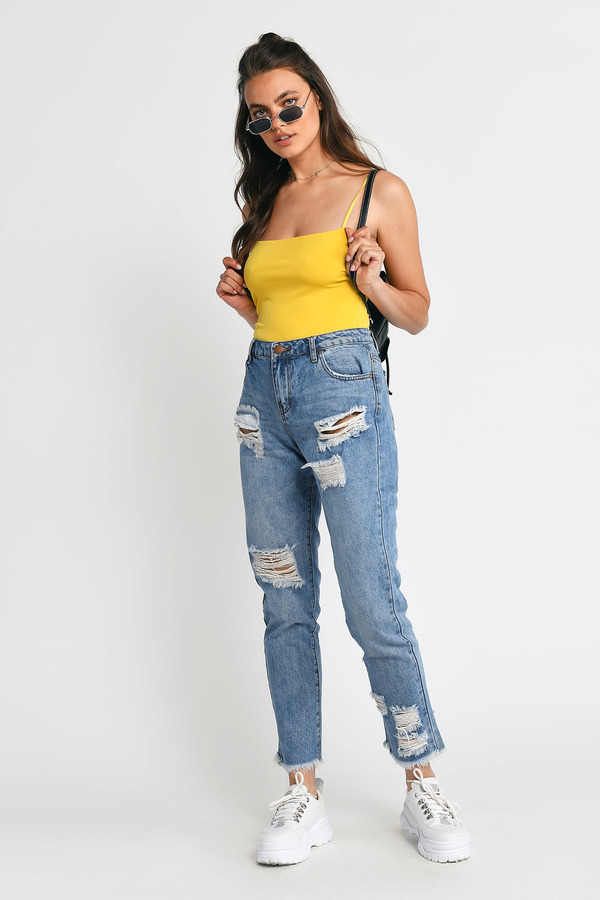

In [48]:
img_path = "./images/model_1.jpg"
image = Image.open(img_path)
imsize = 224
# Transforms image format and size for input of network models
preprocess = transforms.Compose([ 
    transforms.Resize((imsize,imsize)),
    transforms.ToTensor(),
    transforms.Normalize(
    mean = [0.485, 0.456, 0.406],
    std = [0.229, 0.224, 0.225])
])
my_image = preprocess(image).unsqueeze(0).cuda()
image

### 2. Load Model

In [17]:
vgg = models.vgg16(pretrained=True)
model = vgg.cuda()

### 3. Take Feature Maps at given layer

In [55]:
x = my_image  # put image into x
layer_num = 30 #  target layer number

for count, layer in enumerate(model.features):
    x = layer(x)
    if count == layer_num:
        output = x
        name = str(layer)

featuremap = []
output = output.data.cpu().squeeze(0)
for i in range(output.shape[0]):
    featuremap.append(output[i,:,:])

### 4. Visualize Feature maps

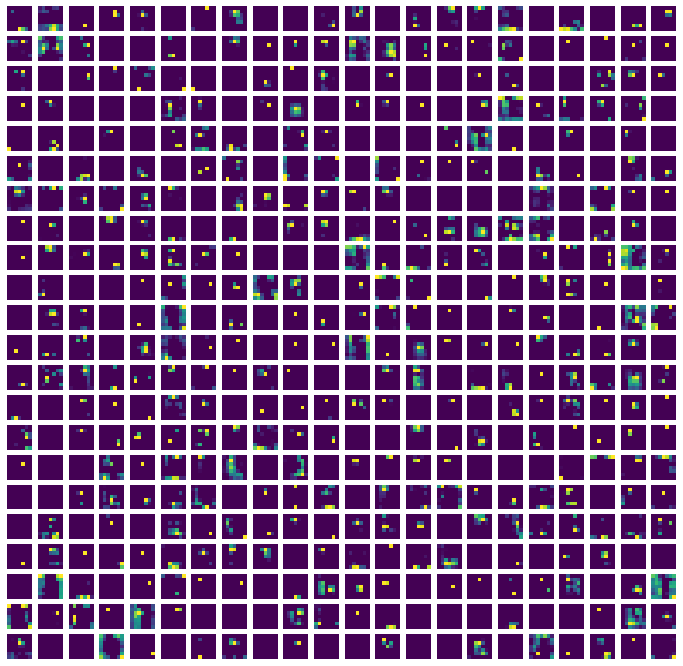

In [56]:
fig = plt.figure()
plt.rcParams["figure.figsize"] = (12, 12)
    
fig_size = int(np.sqrt(len(featuremap)))
for i in range(fig_size * fig_size):
    fig.add_subplot(fig_size, fig_size, i+1)
    imgplot = plt.imshow(featuremap[i])
    plt.axis('off')

### 5. Take Feature maps of All Layers

In [67]:
x = my_image  # put image into x
outputs= []
names = []

for _, layer in enumerate(model.features):
    x = layer(x)
    outputs.append(x)
    names.append(str(layer))

featuremap = []
for img in outputs:
    img = img.squeeze(0)
    img = torch.sum(img, dim=0)
    img = torch.div(img, img.shape[0])
    featuremap.append(img.data.cpu().numpy())

### 6. Visualize Feature maps

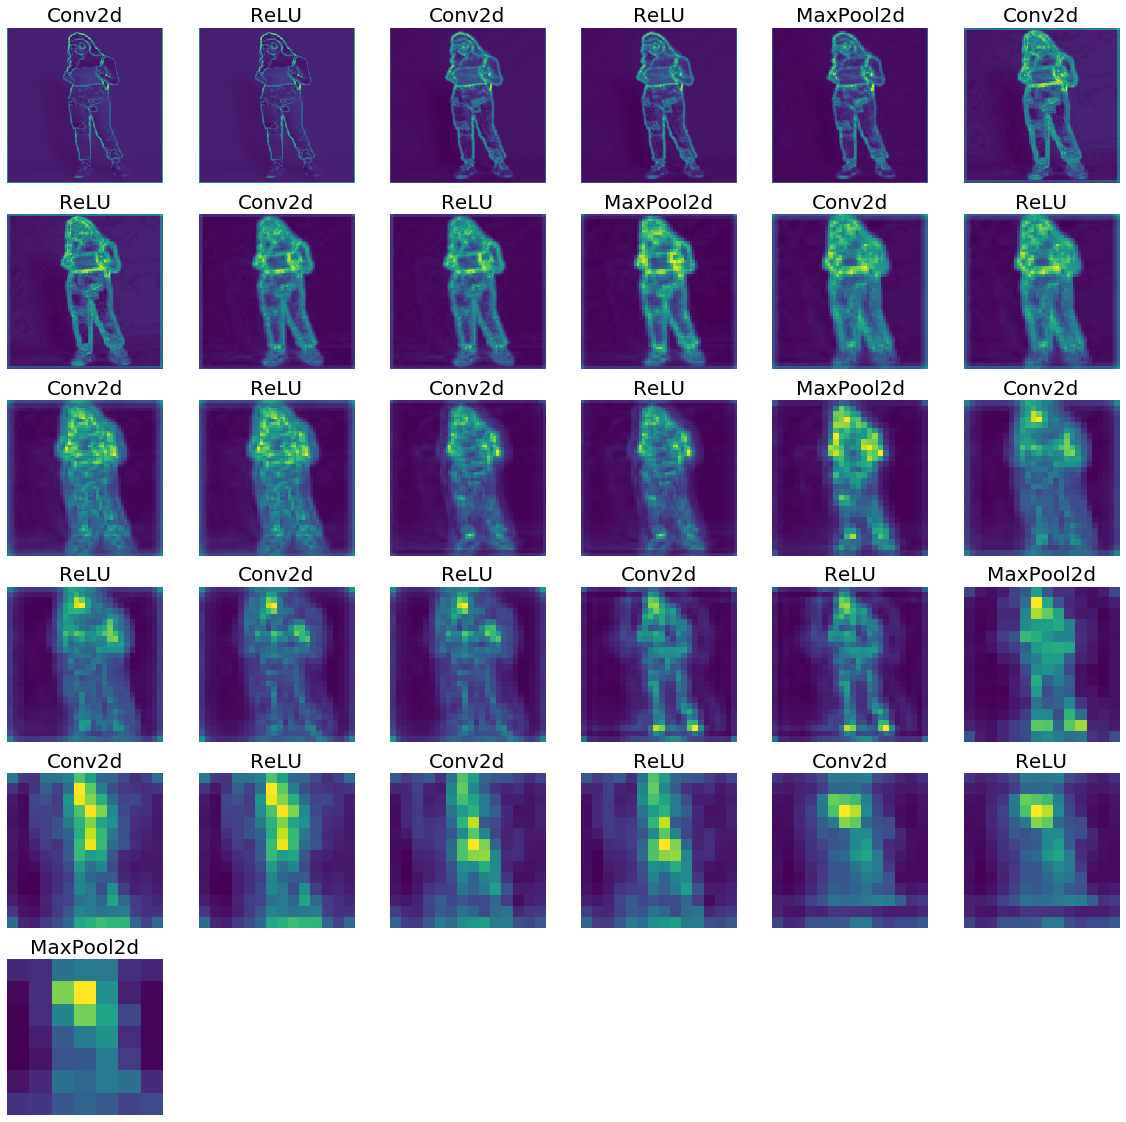

In [76]:
fig = plt.figure()
plt.rcParams["figure.figsize"] = (20, 20)
    
fig_size = int(np.sqrt(len(featuremap))) + 1
for i in range(len(featuremap)):
    a = fig.add_subplot(fig_size, fig_size, i+1)
    imgplot = plt.imshow(featuremap[i])
    a.set_title(names[i].partition('(')[0], fontsize=20)
    plt.axis('off')